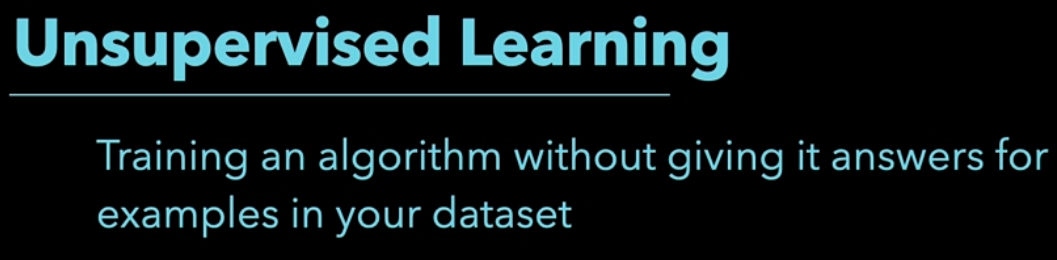

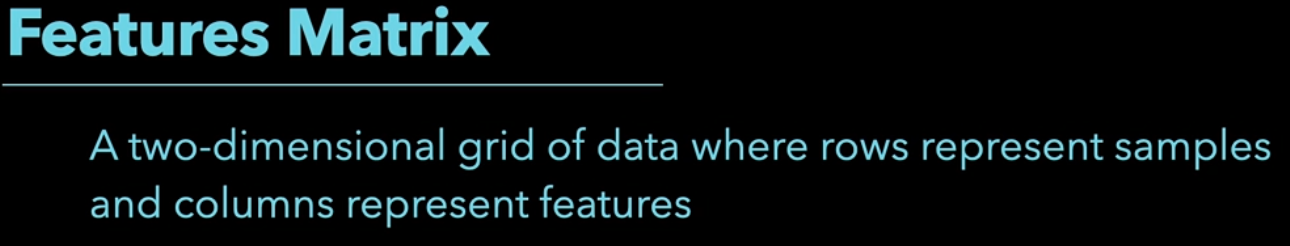

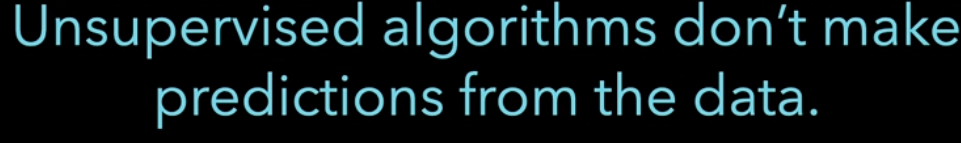

Introduction to K-Means Algorithm

K-means clustering algorithm computes the centroids and iterates until we it finds optimal centroid. It assumes that the number of clusters are already known. It is also called flat clustering algorithm. The number of clusters identified from data by algorithm is represented by ‘K’ in K-means.

In this algorithm, the data points are assigned to a cluster in such a manner that the sum of the squared distance between the data points and centroid would be minimum. It is to be understood that less variation within the clusters will lead to more similar data points within same cluster.

In [ ]:
Working of K-Means Algorithm

We can understand the working of K-Means clustering algorithm with the help of following steps −

    Step 1 − First, we need to specify the number of clusters, K, need to be generated by this algorithm.

    Step 2 − Next, randomly select K data points and assign each data point to a cluster.
             In simple words, classify the data based on the number of data points.

    Step 3 − Now it will compute the cluster centroids.

    Step 4 − Next, keep iterating the following until we find optimal centroid which is the assignment of data points to the clusters 
             that are not changing any more −
4.1 − First, the sum of squared distance between data points and centroids would be computed.

4.2 − Now, we have to assign each data point to the cluster that is closer than other cluster (centroid).

4.3 − At last compute the centroids for the clusters by taking the average of all data points of that cluster.

K-means follows Expectation-Maximization approach to solve the problem. The Expectation-step is used for assigning the data points to the closest cluster and the Maximization-step is used for computing the centroid of each cluster.

While working with K-means algorithm we need to take care of the following things −

While working with clustering algorithms including K-Means, it is recommended to standardize the data because such algorithms use distance-based measurement to determine the similarity between data points.

Due to the iterative nature of K-Means and random initialization of centroids, K-Means may stick in a local optimum and may not converge to global optimum. That is why it is recommended to use different initializations of centroids.


Clustering algorithms help identify distinct groups of data. An example is to use clustering to group customers based on their behavior. There are many clustering algorithms, but the most commonly used algorithm is K-Means. In this video, I'll show you how to use K-Means clustering to find some underlying structure in your data. 

## Import Libraries

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

## Load the Dataset
The Iris dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. The code below loads the iris dataset.

In [3]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Arrange Data into Features Matrix

K-Means is considered an unsupervised learning algorthm. This means you only need a features matrix. In the iris dataset, there are four features. In this notebook, the features matrix will only be two features as it is easier to visualize clusters in two dimensions. 

In [4]:
features = ['petal length (cm)','petal width (cm)']

# Create features matrix
x = df.loc[:, features].values

In [5]:
x

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

The variable y below is for demonstational purposes in this notebook and not needed if you want to do K-Means. 

In [6]:
y = data.target

In [95]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Standardize the Data
KMeans is effected by scale so you need to scale the features in the data before using KMeans. You can transform the data onto unit scale (mean = 0 and variance = 1) for better performance. Scikit-Learn's `StandardScaler` helps standardize the dataset’s features. 

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
# Apply Standardization to features matrix X
x = df.loc[:, features].values

In [9]:
x = StandardScaler().fit_transform(x)

In [10]:
x

array([[-1.34022653e+00, -1.31544430e+00],
       [-1.34022653e+00, -1.31544430e+00],
       [-1.39706395e+00, -1.31544430e+00],
       [-1.28338910e+00, -1.31544430e+00],
       [-1.34022653e+00, -1.31544430e+00],
       [-1.16971425e+00, -1.05217993e+00],
       [-1.34022653e+00, -1.18381211e+00],
       [-1.28338910e+00, -1.31544430e+00],
       [-1.34022653e+00, -1.31544430e+00],
       [-1.28338910e+00, -1.44707648e+00],
       [-1.28338910e+00, -1.31544430e+00],
       [-1.22655167e+00, -1.31544430e+00],
       [-1.34022653e+00, -1.44707648e+00],
       [-1.51073881e+00, -1.44707648e+00],
       [-1.45390138e+00, -1.31544430e+00],
       [-1.28338910e+00, -1.05217993e+00],
       [-1.39706395e+00, -1.05217993e+00],
       [-1.34022653e+00, -1.18381211e+00],
       [-1.16971425e+00, -1.18381211e+00],
       [-1.28338910e+00, -1.18381211e+00],
       [-1.16971425e+00, -1.31544430e+00],
       [-1.28338910e+00, -1.05217993e+00],
       [-1.56757623e+00, -1.31544430e+00],
       [-1.

## Plot Data to Estimate Number of Clusters
If your data is 2 or three dimensional, it is a good idea to plot your data before clustering. Hopefully you can see if there are any natural looking clusters. 

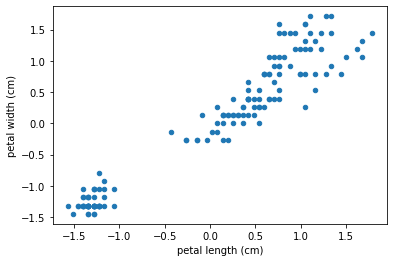

In [11]:
# Plot 
pd.DataFrame(x, columns = features).plot.scatter('petal length (cm)','petal width (cm)' )

# Add labels
plt.xlabel('petal length (cm)');
plt.ylabel('petal width (cm)');

## KMeans Clustering
In K-Means clustering, you need to specify the number of clusters (k) you want. In Scikit-Learn, this parameter is called `n_clusters`. In the case of the code below, the number of clusters is set to 3 because most people who use the Iris dataset happen to know there are three species. 

In [ ]:
from sklearn.cluster import KMeans

In [12]:
# Make an instance of KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=1)

# Fit only on a features matrix
kmeans.fit(x) #training 

KMeans(n_clusters=3, random_state=1)

In [13]:
# Get labels and cluster centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [14]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
centroids

array([[-1.30498732, -1.25489349],
       [ 1.02799959,  1.12797813],
       [ 0.3058728 ,  0.16541778]])

In [16]:
centroids[:,0]

array([-1.30498732,  1.02799959,  0.3058728 ])

In [55]:
kmeans.cluster_centers_

array([[-1.30498732, -1.25489349],
       [ 1.02799959,  1.12797813],
       [ 0.3058728 ,  0.16541778]])

In [17]:
kmeans.inertia_

18.02696261254407

In [19]:
from sklearn import metrics

In [20]:
metrics.accuracy_score(y,kmeans.labels_)

0.37333333333333335

In [93]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Visually Evaluate the Clusters

In [22]:
x = pd.DataFrame(x, columns = features)

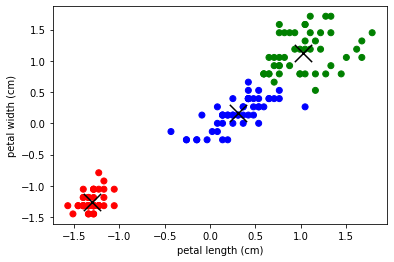

In [23]:
colormap = np.array(['r', 'g', 'b'])
plt.scatter(x['petal length (cm)'], x['petal width (cm)'], c=colormap[labels])
plt.scatter(centroids[:,0], centroids[:,1], s = 300, marker = 'x', c = 'k')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)');

## Visually Evaluate the Clusters and Compare Species

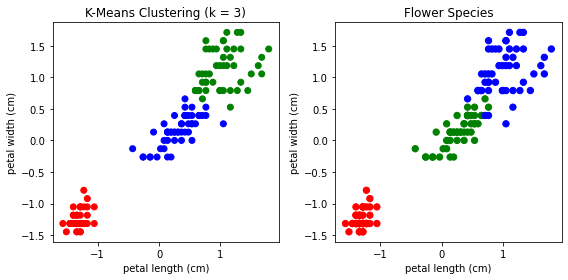

In [24]:
plt.figure(figsize=(8,4))

plt.subplot(1, 2, 1)
plt.scatter(x['petal length (cm)'], x['petal width (cm)'], c=colormap[labels])
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)');
plt.title('K-Means Clustering (k = 3)')
 
plt.subplot(1, 2, 2)
plt.scatter(x['petal length (cm)'], x['petal width (cm)'], c=colormap[y], s=40)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)');
plt.title('Flower Species')

plt.tight_layout()

They look pretty similar. Looks like KMeans picked up flower differences with only two features and not the labels. The colors are different in the two graphs simply because KMeans gives out a arbitrary cluster number and the iris dataset has an arbitrary number in the target column. 

So that's it-- KMeans is a popular clustering algorithm that you can use to find structure in your data. 

In [73]:
#finding distortion for every k- value

# K = 1 to 10,for every k value we calculate distortion,then we plot the line graph between K and Distortion
distortions = []
K = range(1,18)
print(K)

range(1, 18)


In [74]:
from scipy.spatial.distance import cdist
import math
df.head()
X =df.loc[:,['petal length (cm)','petal width (cm)']]

In [34]:
X

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [75]:
# Finding the distortion in every set as the min Euclidean distance between two points
for k in K: 
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(X)
    distortions.append(sum(np.min(cdist(X,kmeans_model.cluster_centers_,"euclidean"),axis=1))/X.shape[0])

In [76]:
#printing the distortion
distortions

[1.707364436891335,
 0.583920126422277,
 0.36876646966749166,
 0.2998651974037013,
 0.2643809089765956,
 0.23357596529783659,
 0.21831297260668545,
 0.1981142413620355,
 0.18410484384588674,
 0.1709925941284482,
 0.16521199601719025,
 0.15612388474348893,
 0.14834045185828404,
 0.14336082329523495,
 0.13632357467441972,
 0.13176838023818196,
 0.12573618872545692]

range(1, 18)
0.12573618872545692


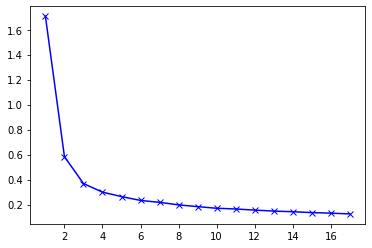

In [78]:
#Plot distortions againt K value
print(K)
# checking for min of K value
print(np.min(distortions))
#Plotting for change in K value
plt.plot(K,distortions,'bx-')

In [ ]:
Import the necessary Libraries for the Hierarchical Clustering

In [1]:
import numpy as np
import pandas as pd

import scipy
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm
from sklearn.preprocessing import scale

In [2]:
#Step 2: Import  the libraries for the Data Visualization
#Configure the output
np.set_printoptions(precision=4,suppress=True)
%matplotlib inline
rcParams["figure.figsize"] =20,10
sb.set_style("whitegrid")

In [3]:
iris = datasets.load_iris()
#scale the data
data = scale(iris.data)
target = pd.DataFrame(iris.target)
variable_names = iris.feature_names
data[0:10]

array([[-0.9007,  1.019 , -1.3402, -1.3154],
       [-1.143 , -0.132 , -1.3402, -1.3154],
       [-1.3854,  0.3284, -1.3971, -1.3154],
       [-1.5065,  0.0982, -1.2834, -1.3154],
       [-1.0218,  1.2492, -1.3402, -1.3154],
       [-0.5372,  1.9398, -1.1697, -1.0522],
       [-1.5065,  0.7888, -1.3402, -1.1838],
       [-1.0218,  0.7888, -1.2834, -1.3154],
       [-1.7489, -0.3622, -1.3402, -1.3154],
       [-1.143 ,  0.0982, -1.2834, -1.4471]])

Step 4: Draw the Dendrogram of the dataset.

In order to estimate the number of centroids. You should verify the number of clusters visually. In this case, you will use the dendrogram.  Use the following code.



In [4]:
z = linkage(data,"ward")

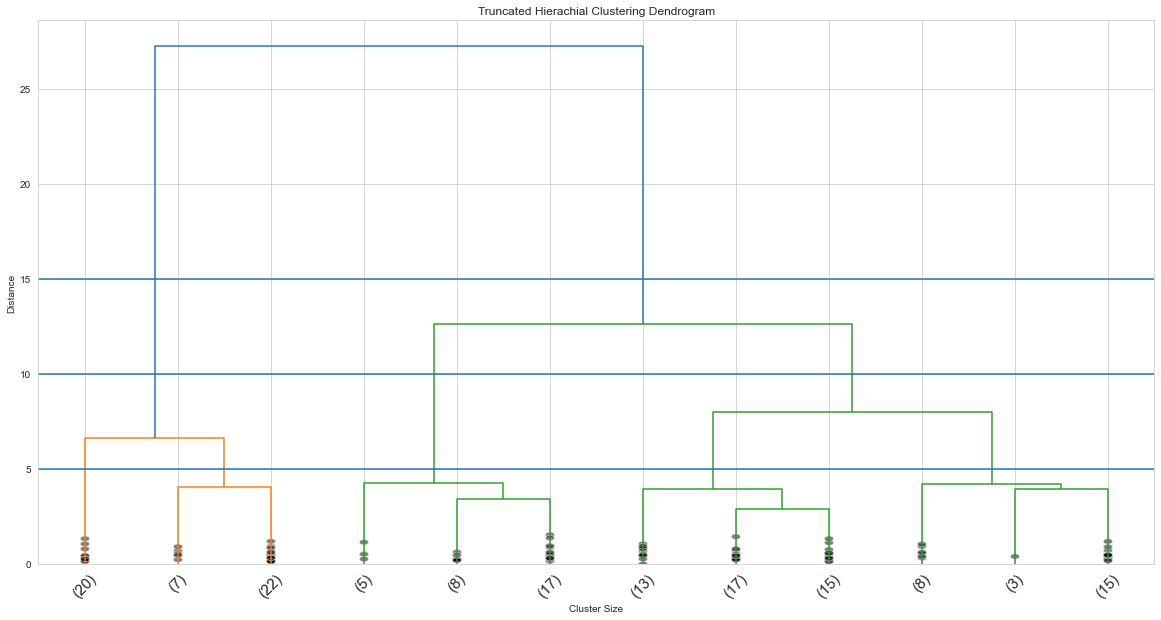

In [5]:
#generate dendrogram
dendrogram(z,truncate_mode= "lastp", p =12, leaf_rotation=45,leaf_font_size=15, show_contracted=True)
plt.title("Truncated Hierachial Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
#divide the cluster
plt.axhline(y=15)
plt.axhline(5)
plt.axhline(10)
plt.show()

In [ ]:
Step 5: Generate the Hierarchical cluster.

In this step, you will generate a Hierarchical Cluster using the various affinity and linkage methods. Doing this you will generate different accuracy score. You will choose the method with the largest score.



In [6]:
#based on the dendrogram we have two clusetes 
k =3 
#build the model
HClustering = AgglomerativeClustering(n_clusters=k , affinity="euclidean",linkage="average")
#fit the model on the dataset
HClustering.fit(data)
#accuracy of the model
sm.accuracy_score(target,HClustering.labels_)

0.6866666666666666

In [8]:
HClustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)